In [ ]:
import matplotlib as plt
import numpy as np
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/XRP.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(39192, 10)

In [ ]:
df.sample(3)

Unix                 Date   Symbol     Open    High      Low  \
35255  1539655200000  2018-10-16 02:00:00  XRPUSDT  0.45747  0.4621  0.45554   
30287  1557597600000  2019-05-11 18:00:00  XRPUSDT  0.33064  0.3332  0.32055   
3343   1680879600000  2023-04-07 15:00:00  XRPUSDT  0.50780  0.5083  0.50590   

         Close  Volume XRP   Volume USDT  tradecount  
35255  0.46140   3482065.2  1.597902e+06        1648  
30287  0.33072  14452881.3  4.755167e+06       11720  
3343   0.50810   9412348.0  4.773688e+06        6834

In [ ]:
df.columns

Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume XRP',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [ ]:
df.describe()

Unix          Open          High           Low         Close  \
count  3.919200e+04  39192.000000  39192.000000  39192.000000  39192.000000   
mean   1.600937e+12      0.472085      0.475932      0.467925      0.472095   
std    4.813308e+10      0.292747      0.296456      0.288716      0.292751   
min    1.525421e+12      0.119400      0.133570      0.101290      0.119420   
25%    1.560851e+12      0.277147      0.278890      0.275230      0.277127   
50%    1.596209e+12      0.380115      0.382300      0.377600      0.380100   
75%    1.631539e+12      0.534100      0.539050      0.529200      0.534100   
max    1.692918e+12      1.937770      1.966890      1.890000      1.937770   

         Volume XRP   Volume USDT     tradecount  
count  3.919200e+04  3.919200e+04   39192.000000  
mean   1.508060e+07  9.432316e+06   11999.645974  
std    2.942826e+07  2.260783e+07   23629.006099  
min    0.000000e+00  0.000000e+00       0.000000  
25%    2.687282e+06  7.796310e+05    2147.000000  
50%    7.169150e+06  2.421747e+06    4583.500000  
75%    1.619152e+07  8.666068e+06   11530.250000  
max    1.404208e+09  6.450570e+08  829061.000000

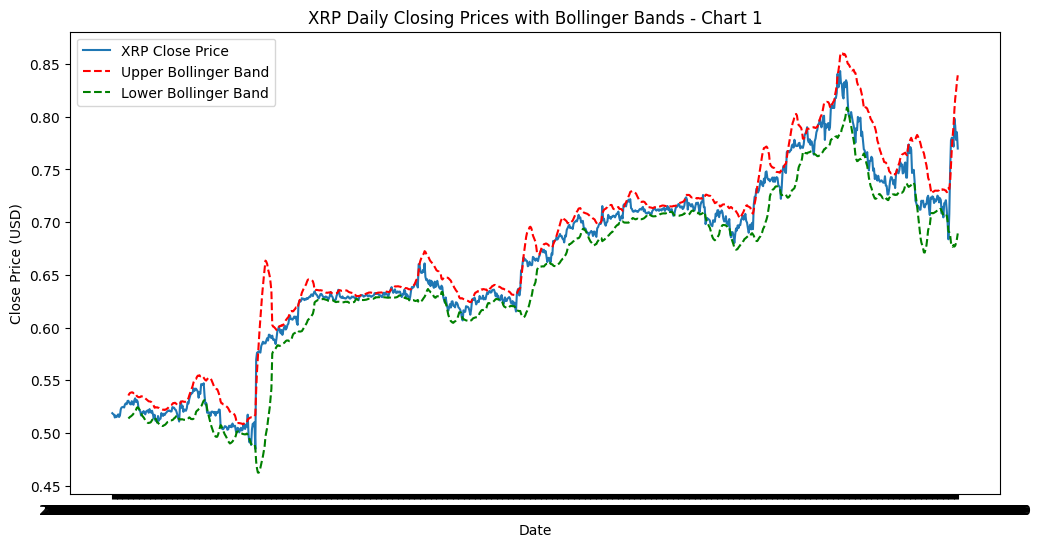

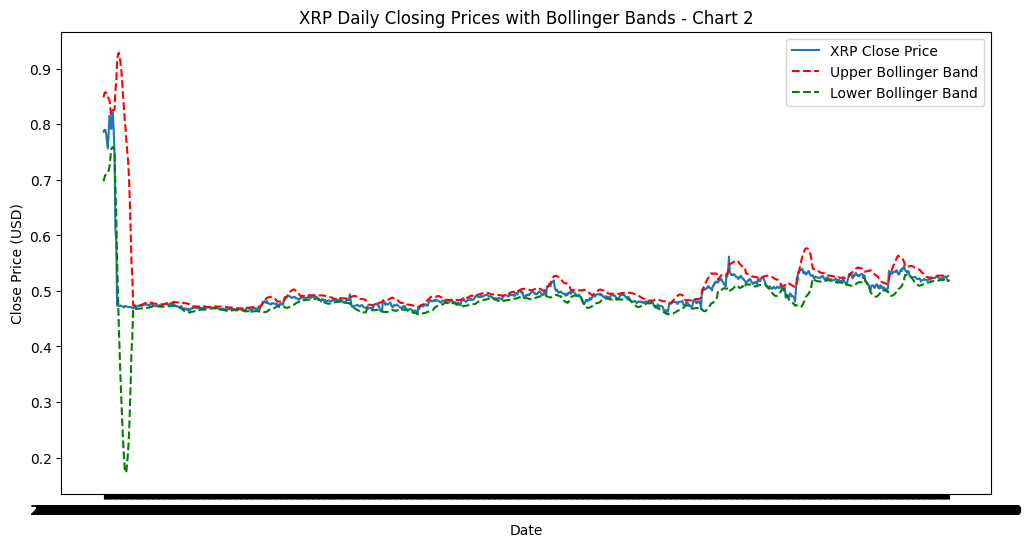

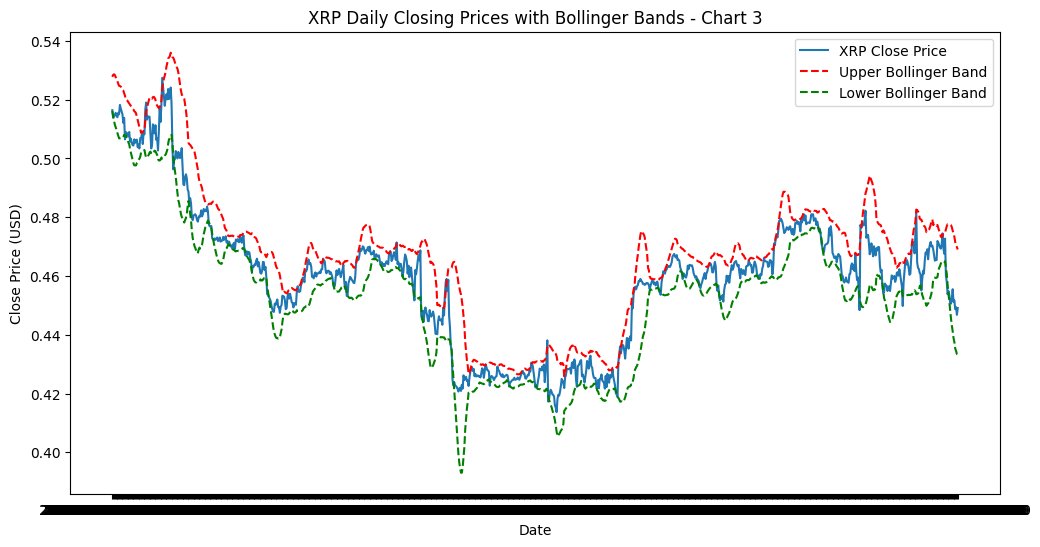

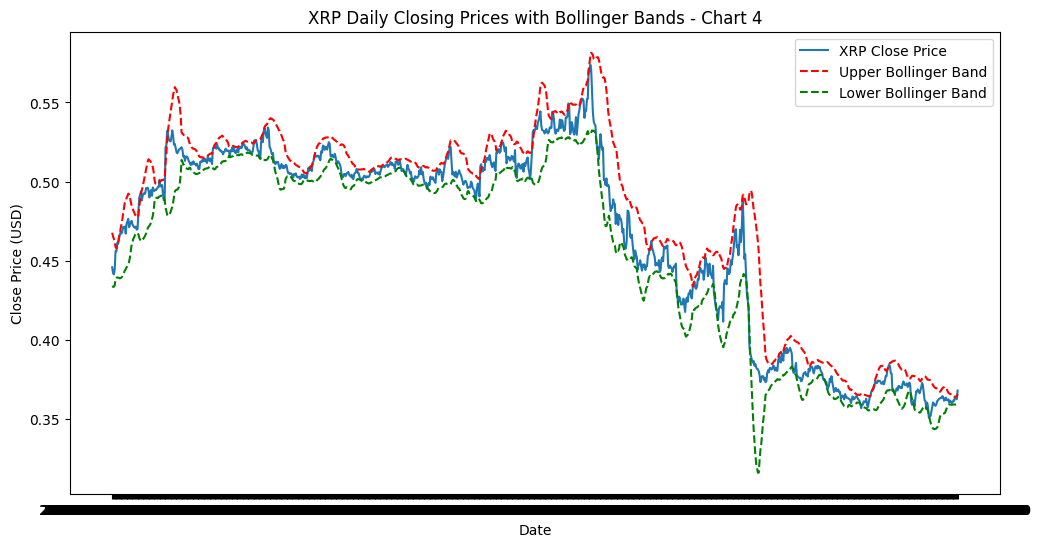

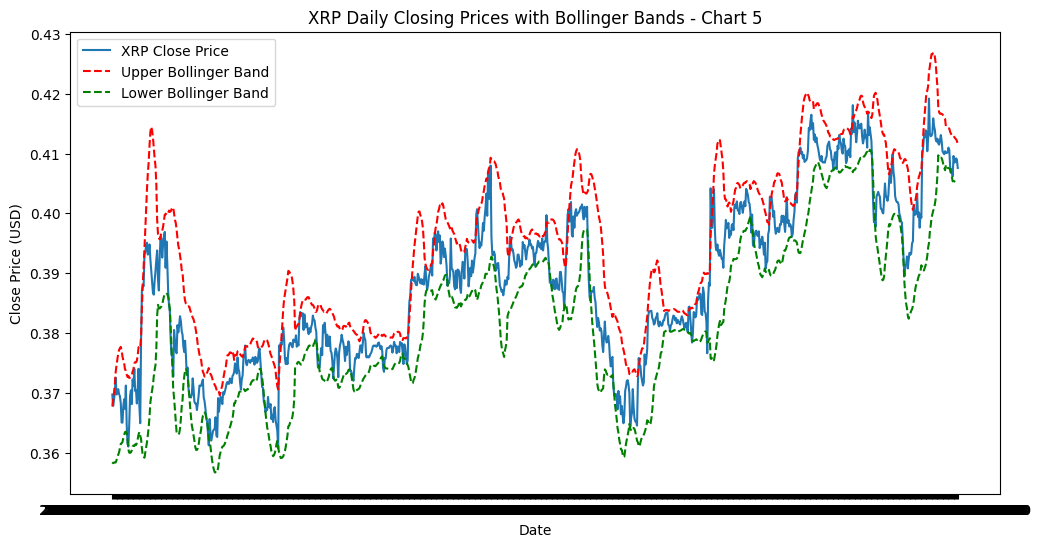

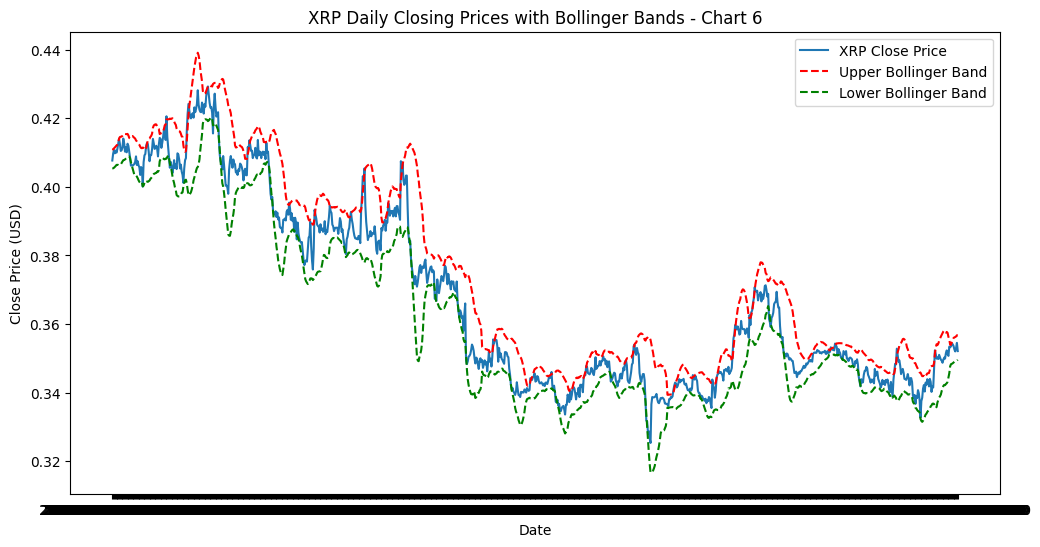

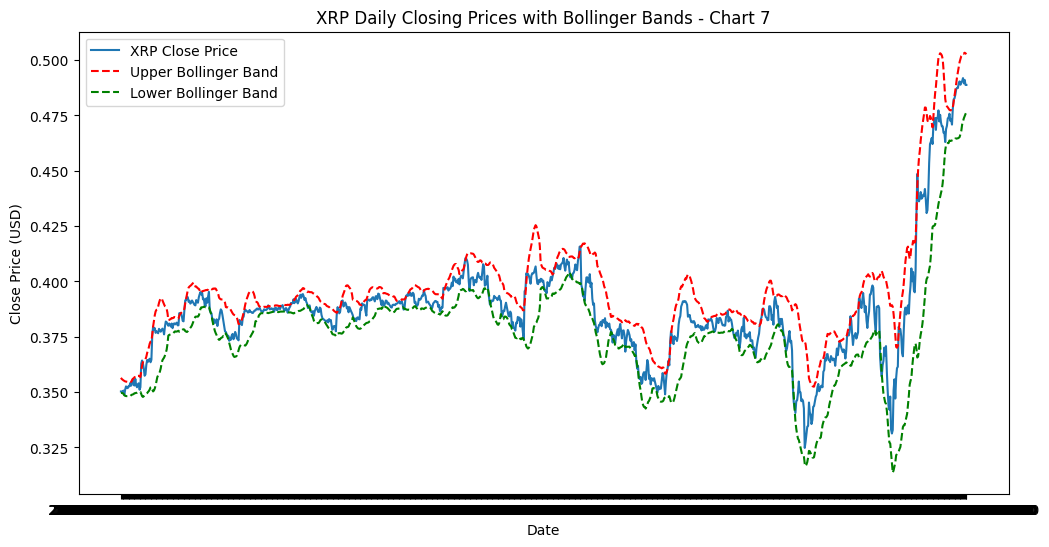

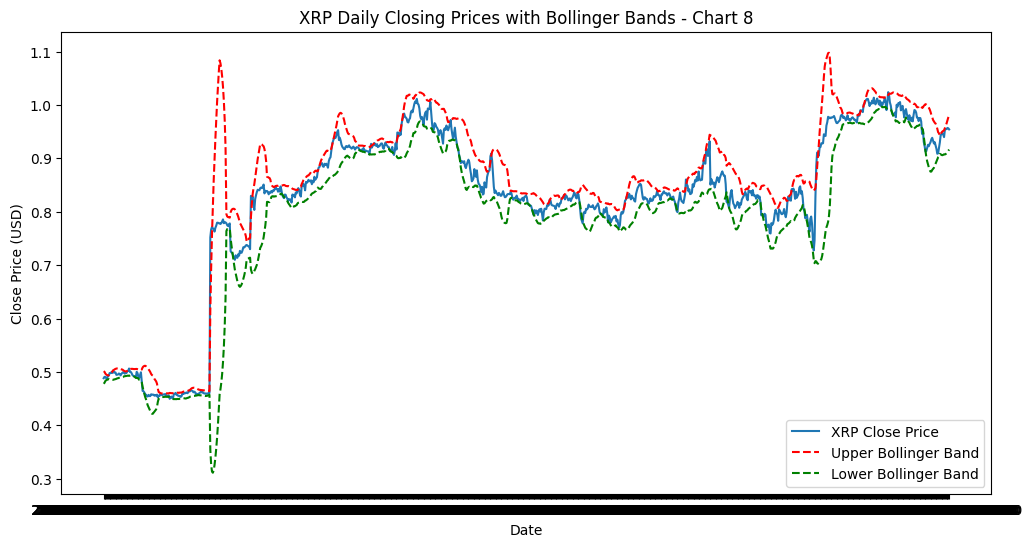

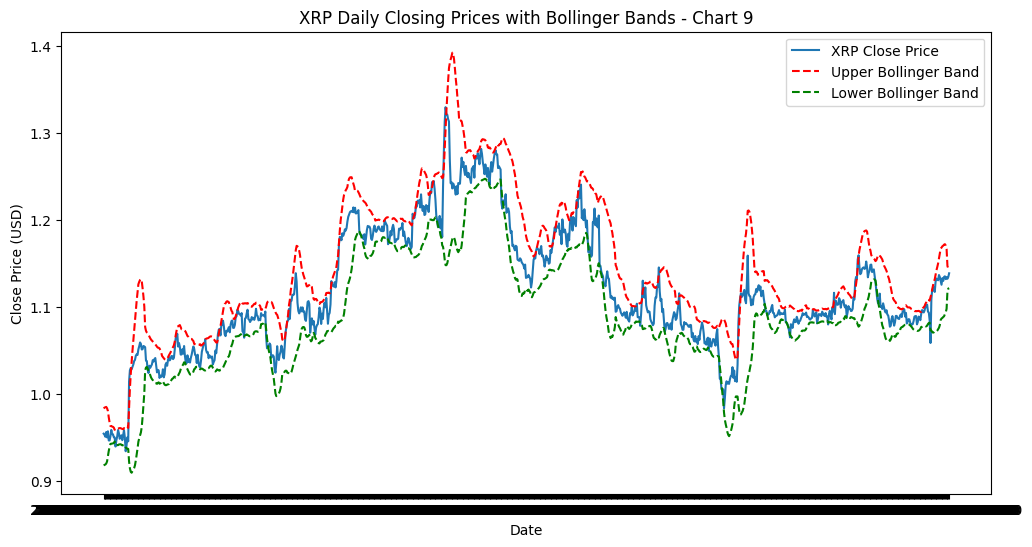

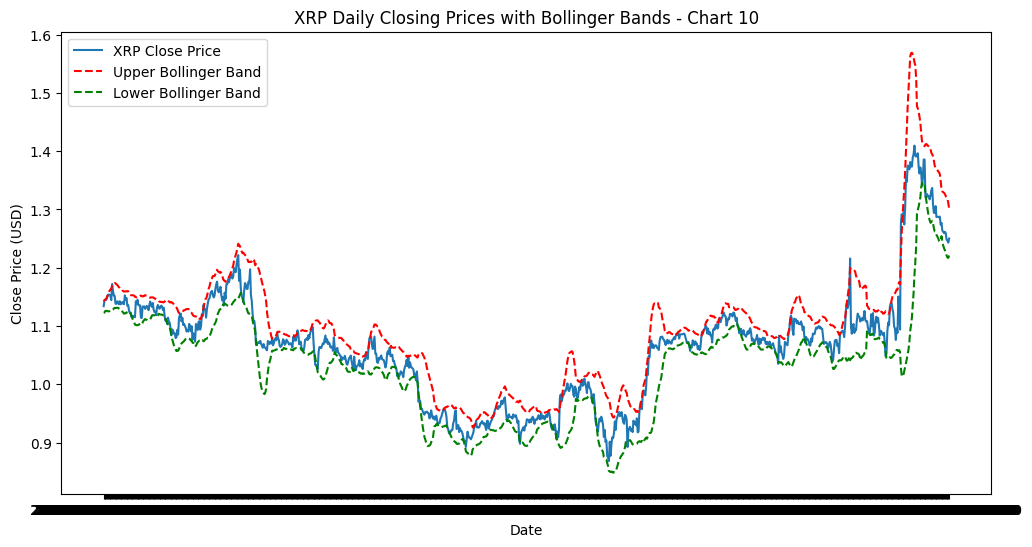

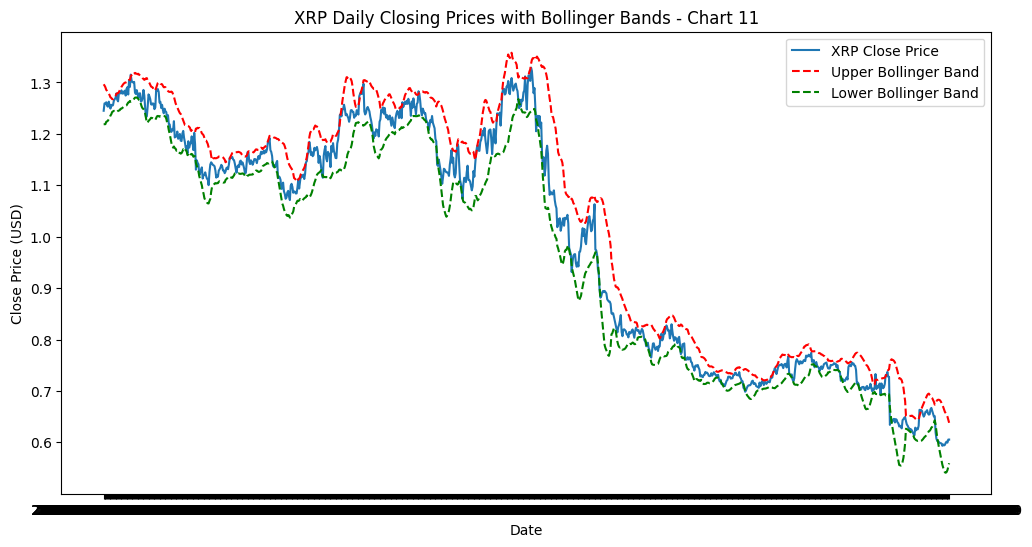

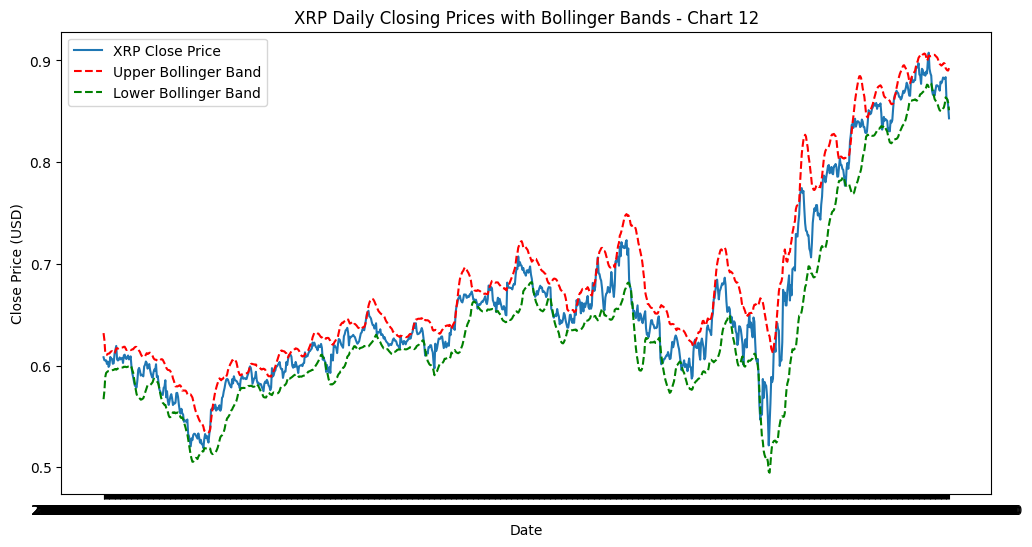

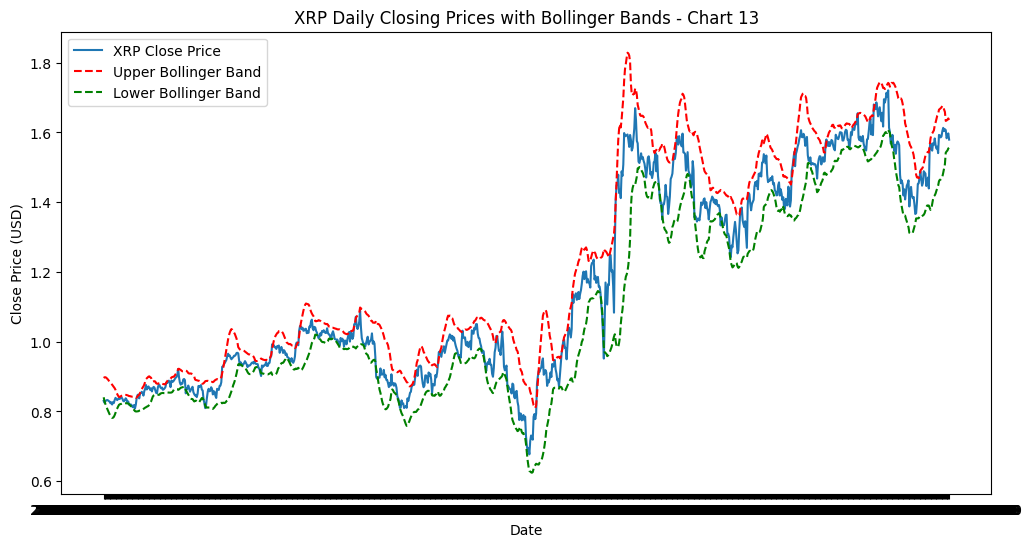

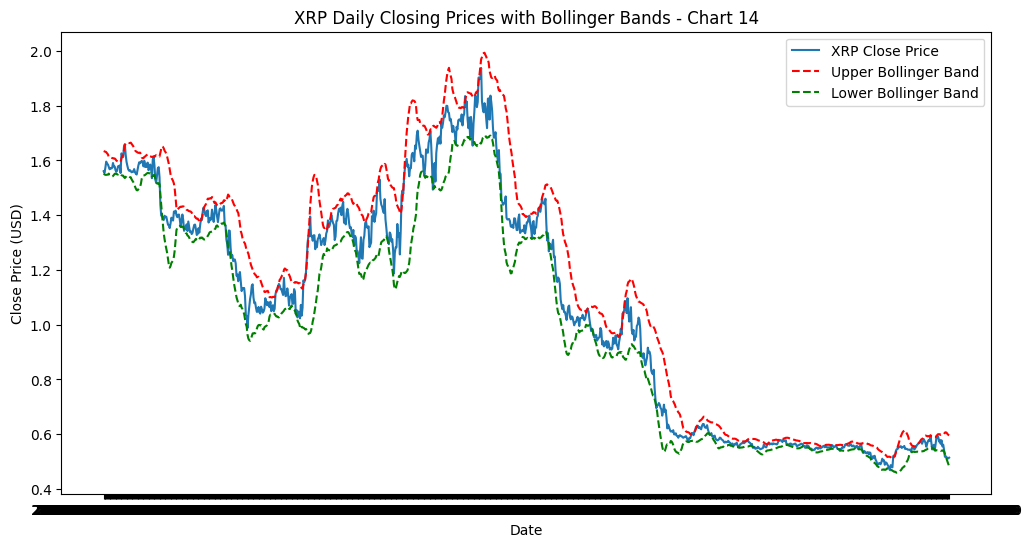

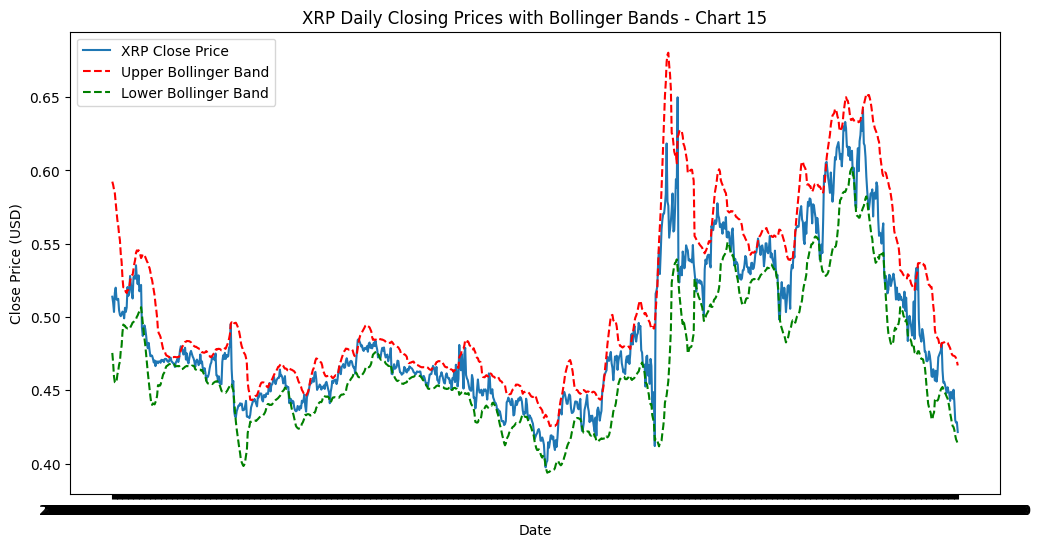

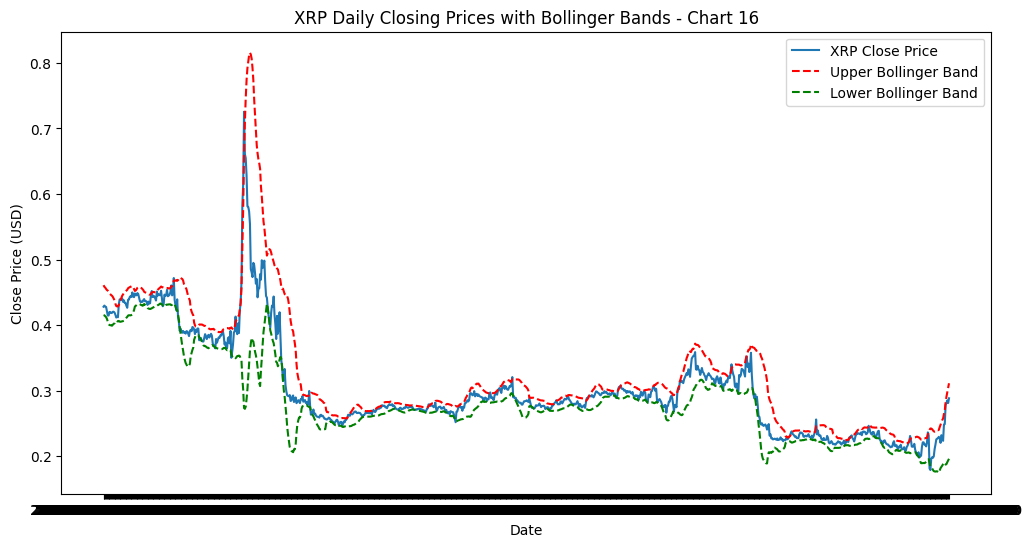

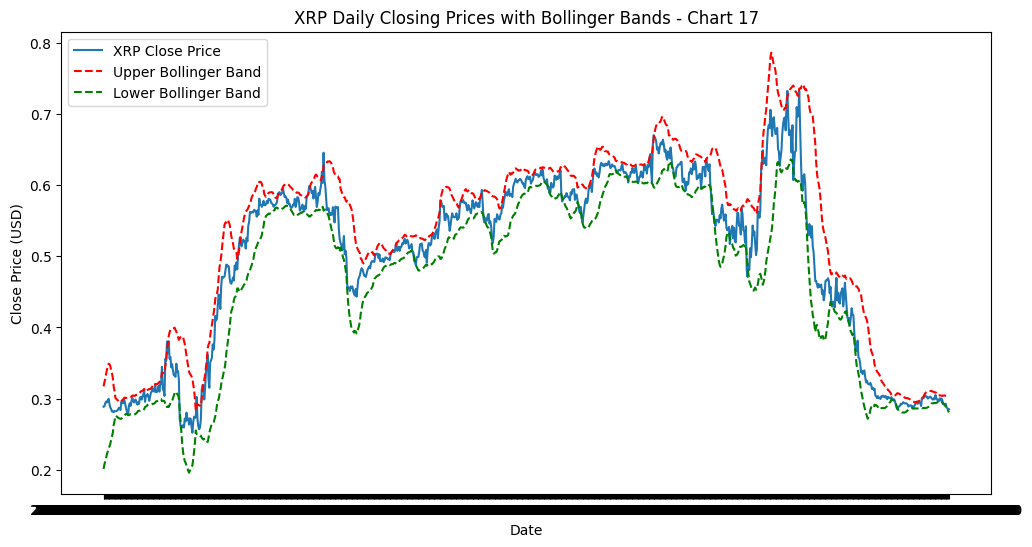

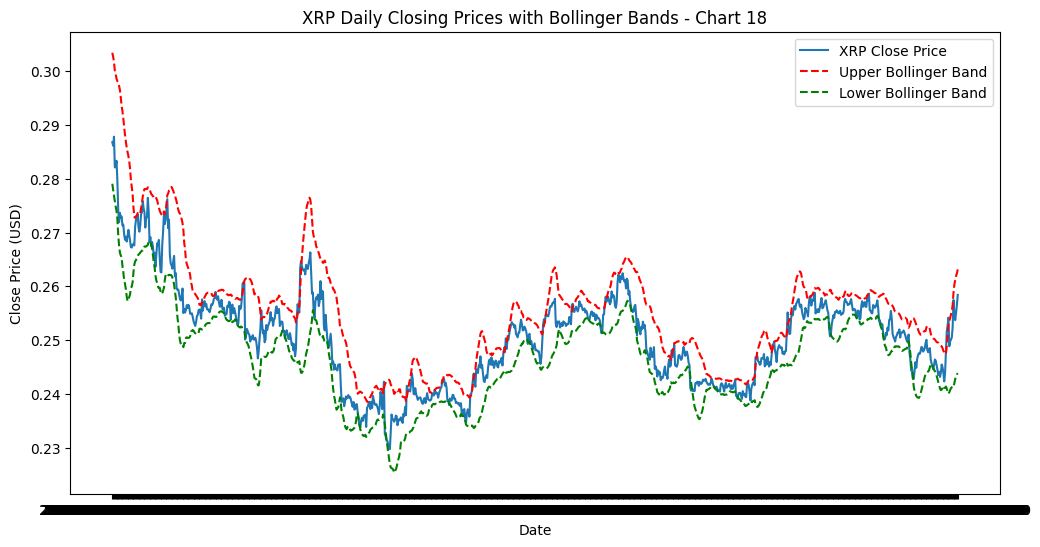

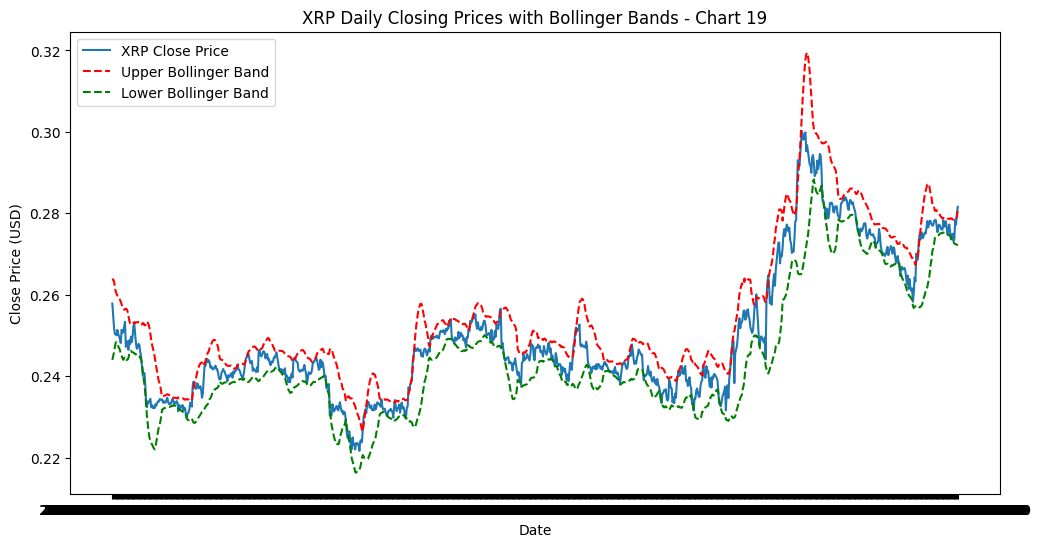

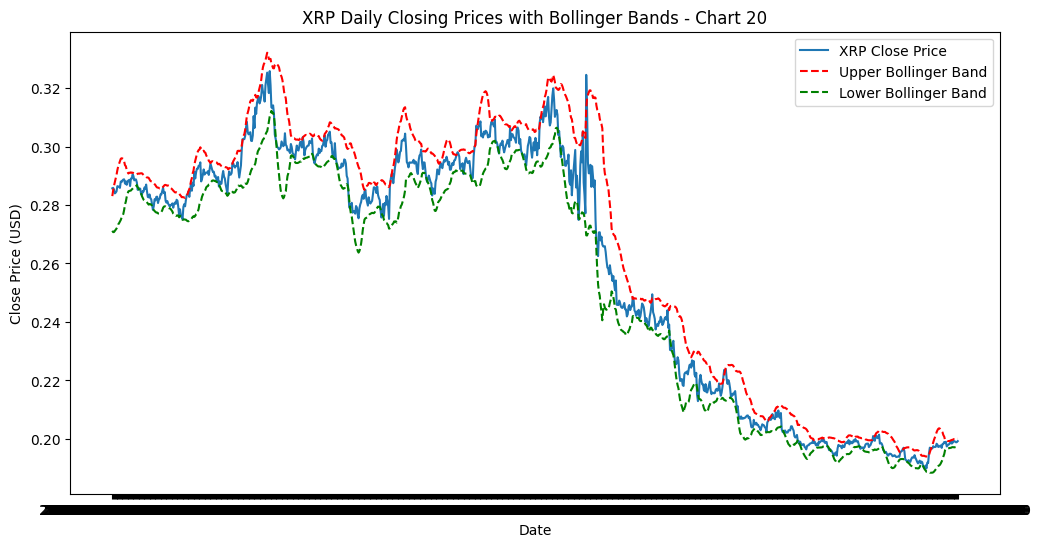

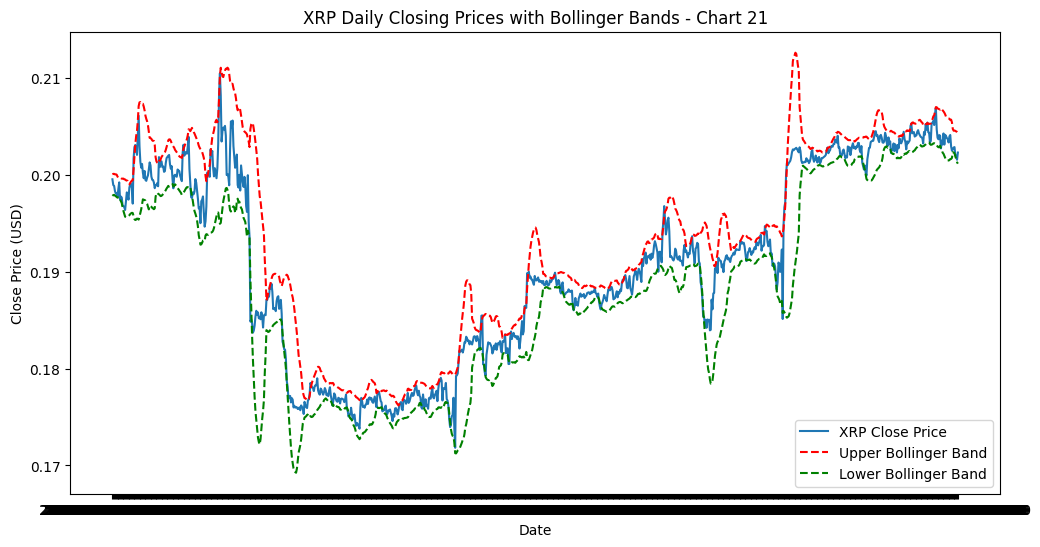

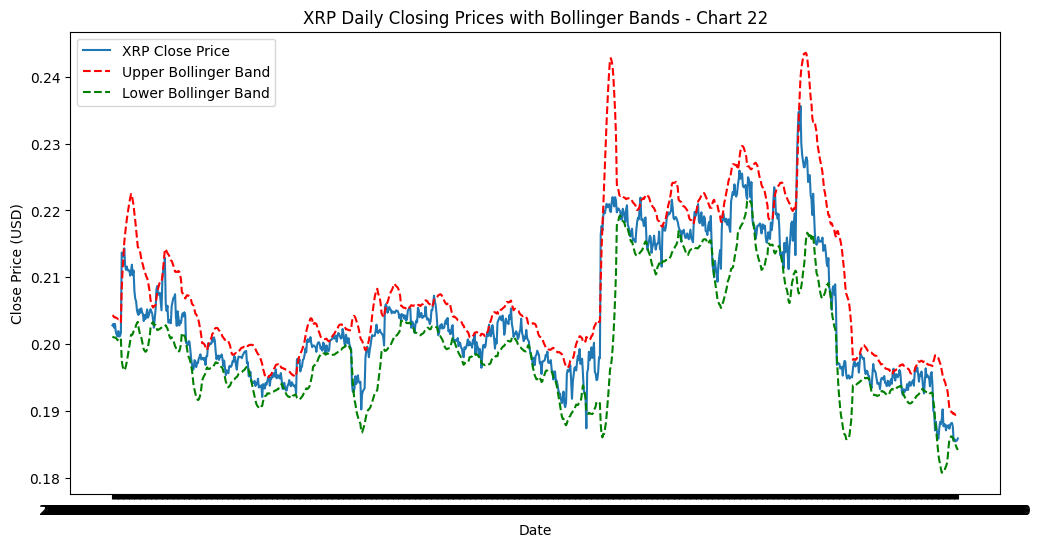

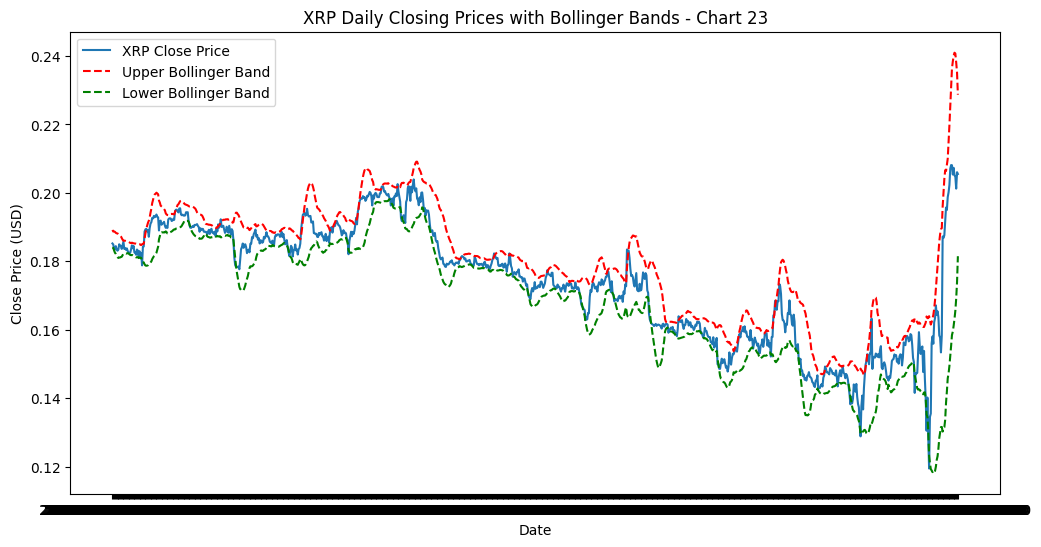

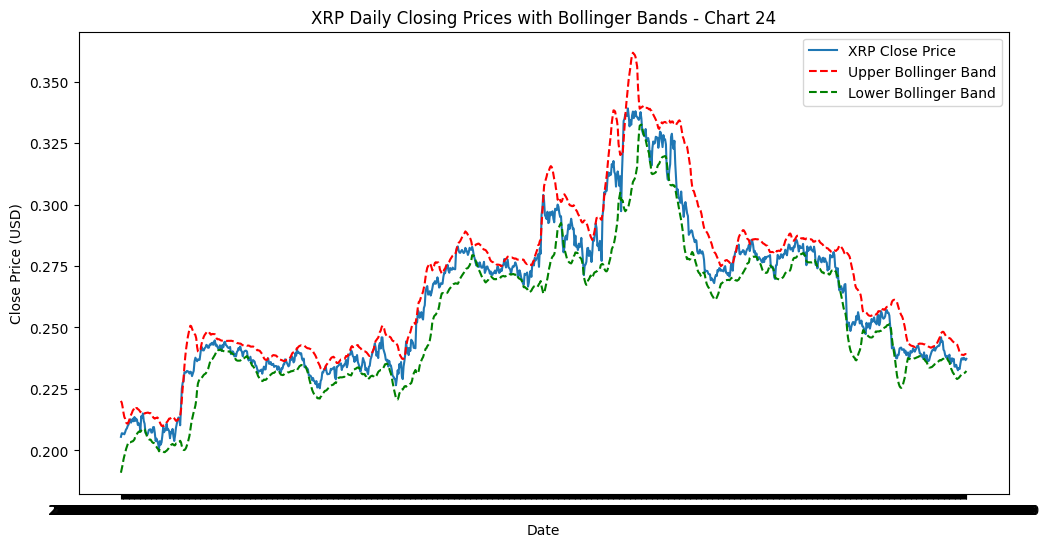

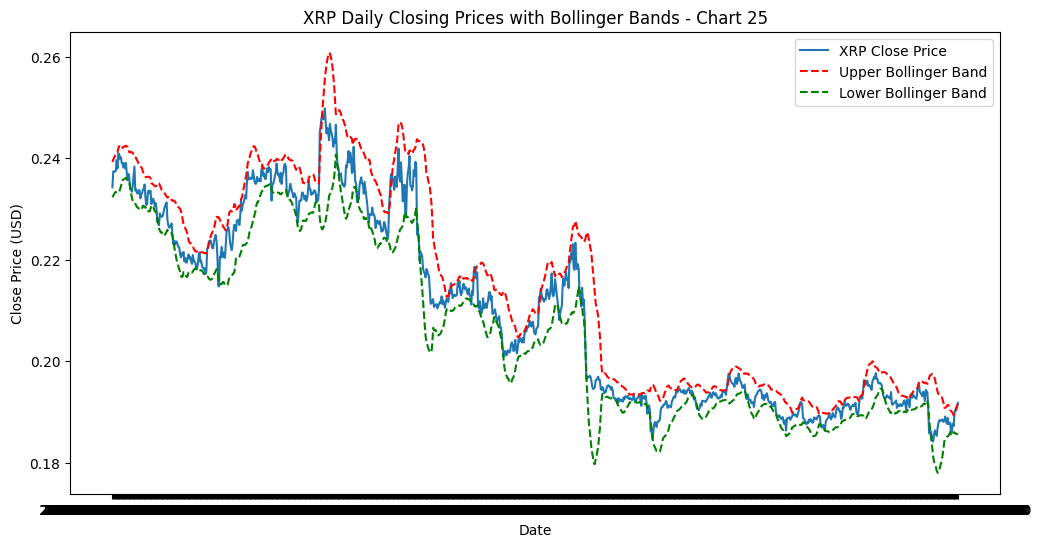

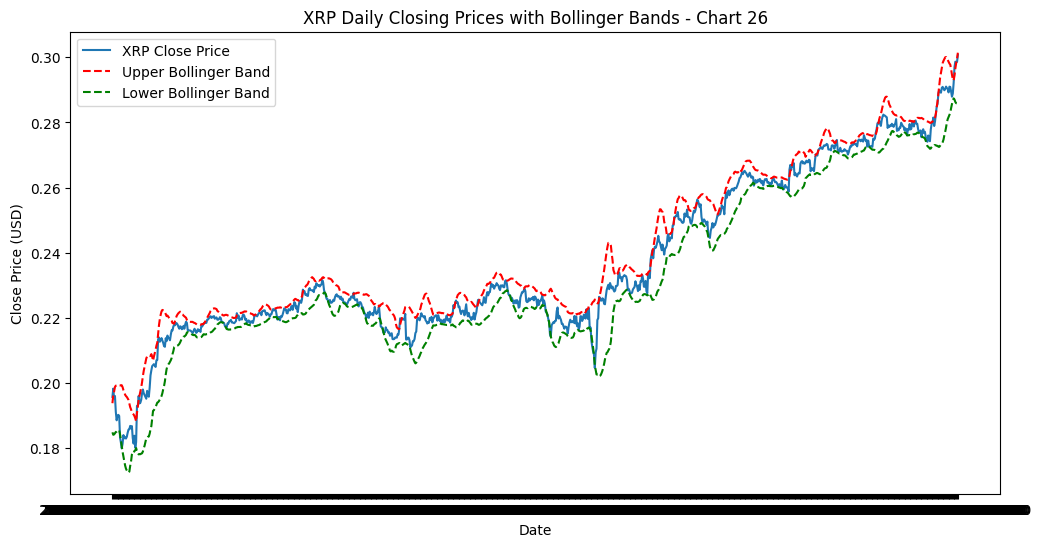

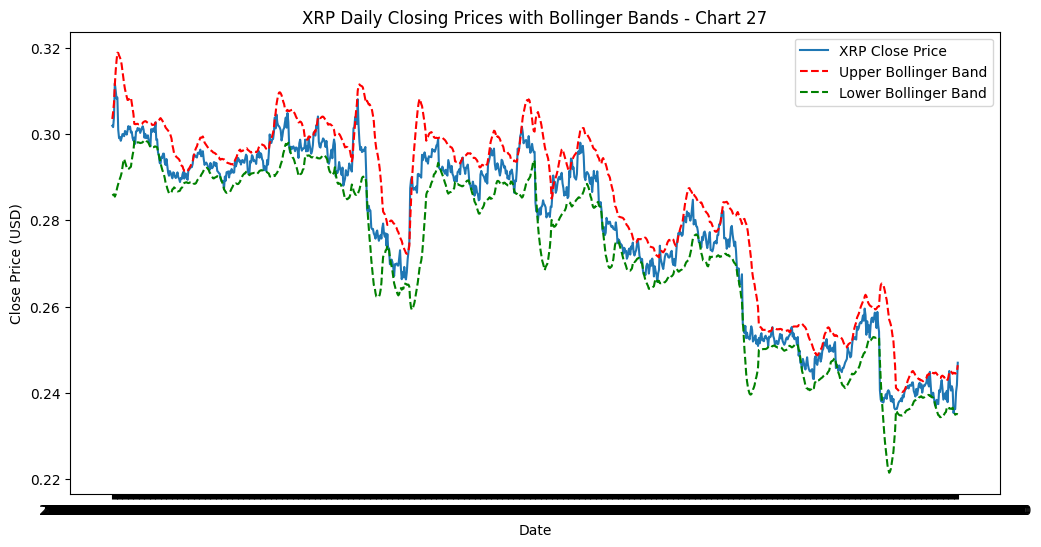

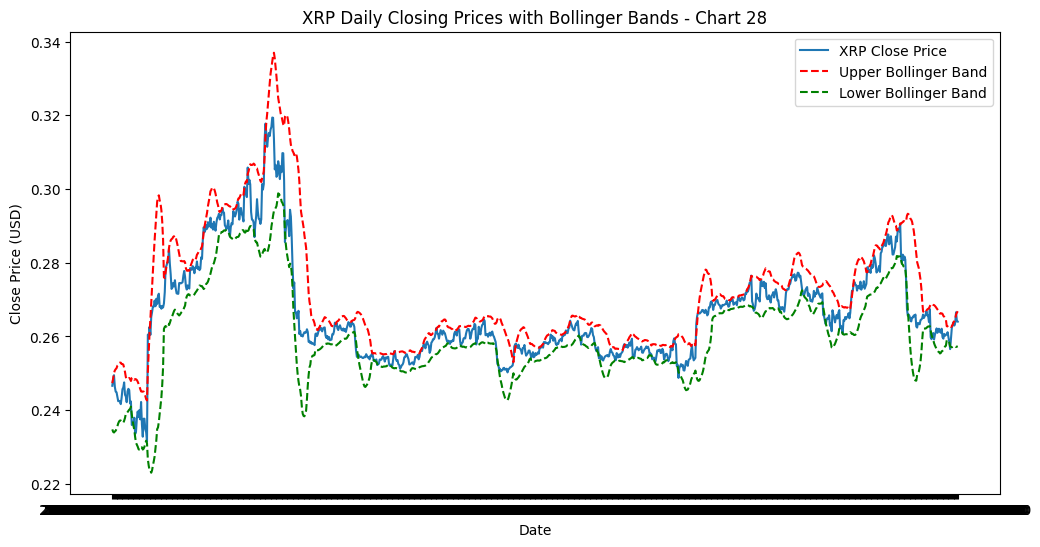

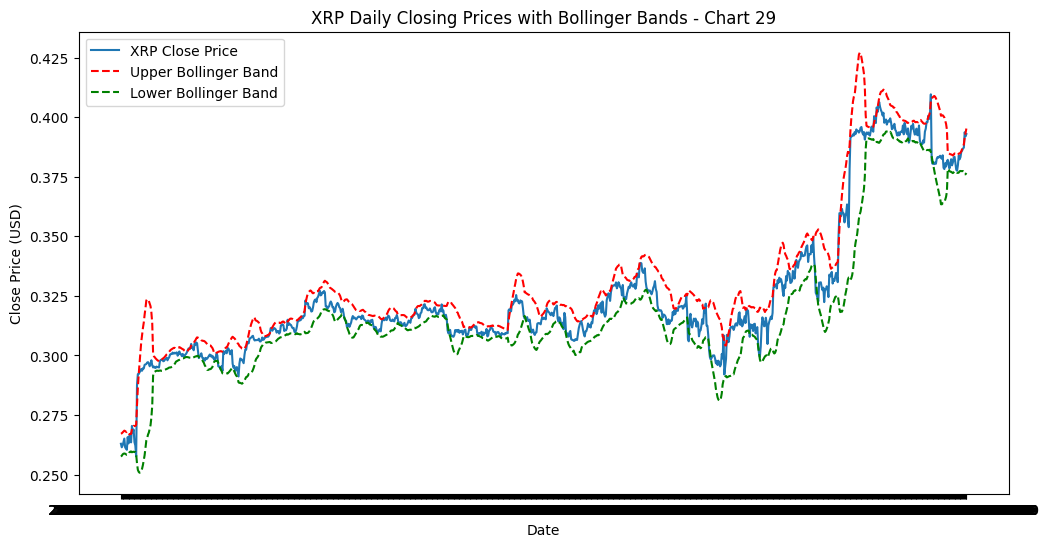

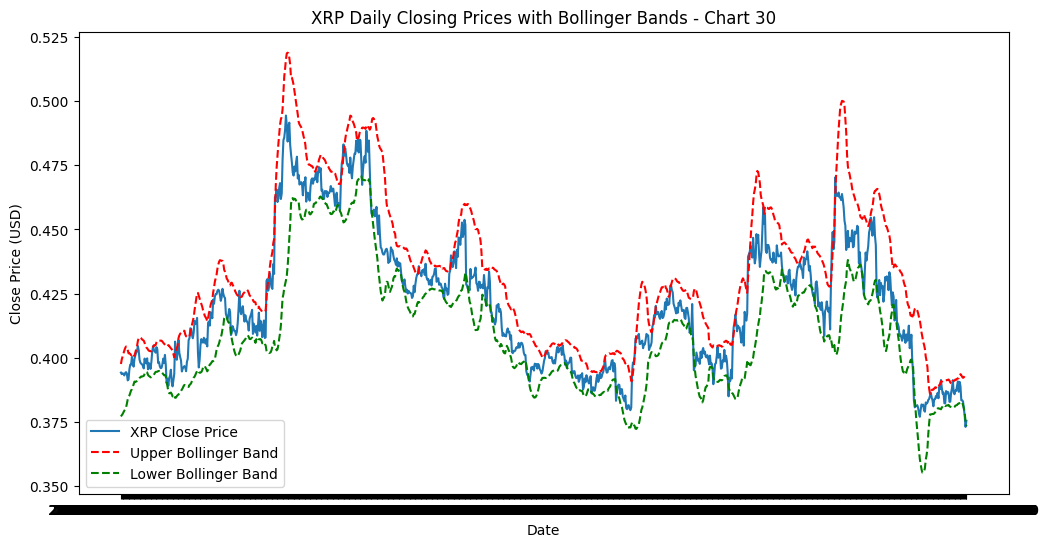

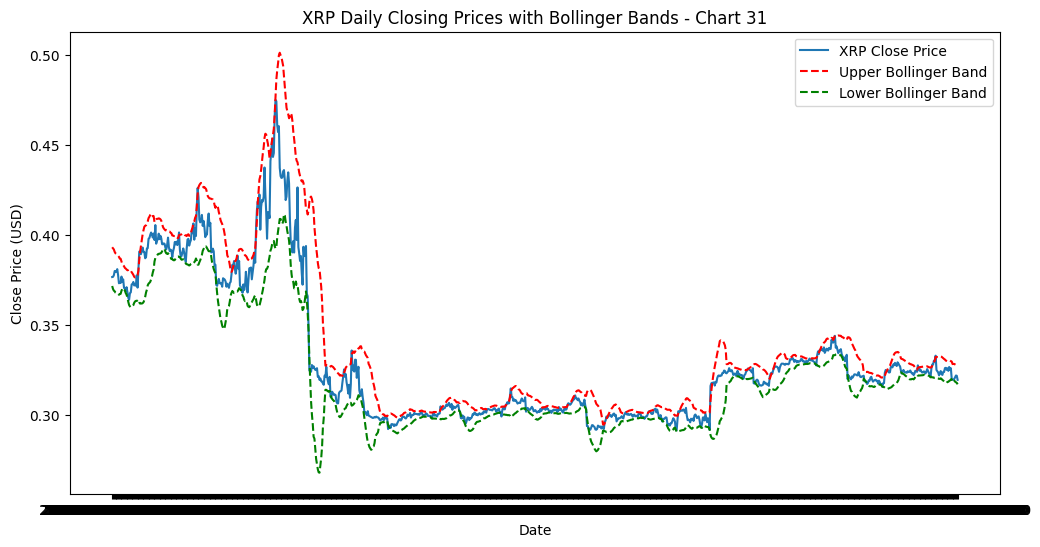

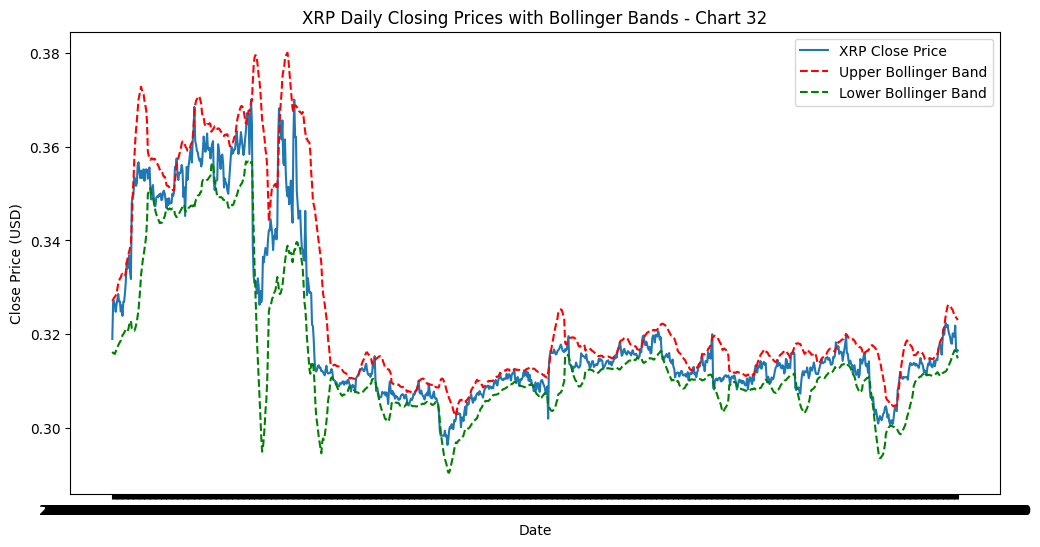

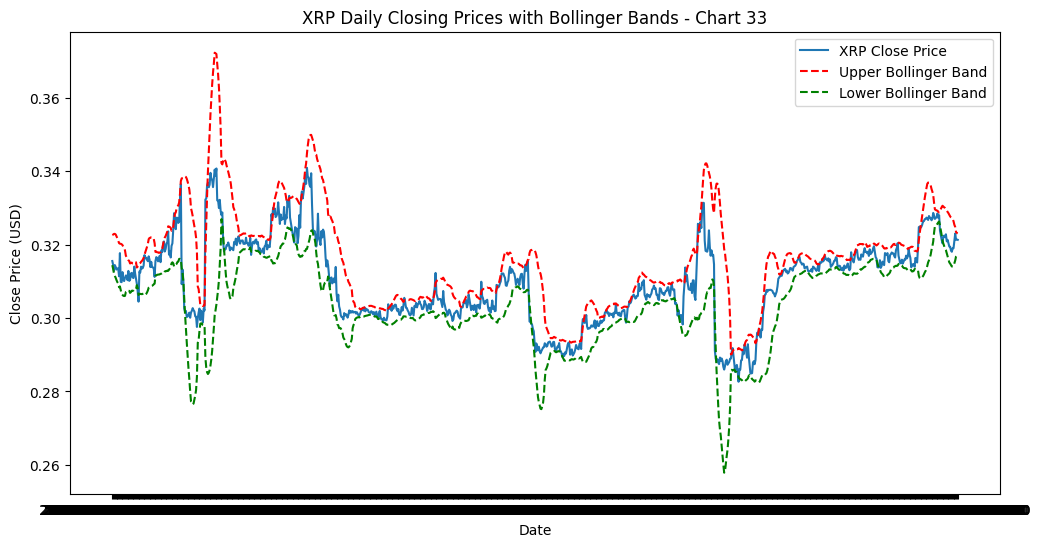

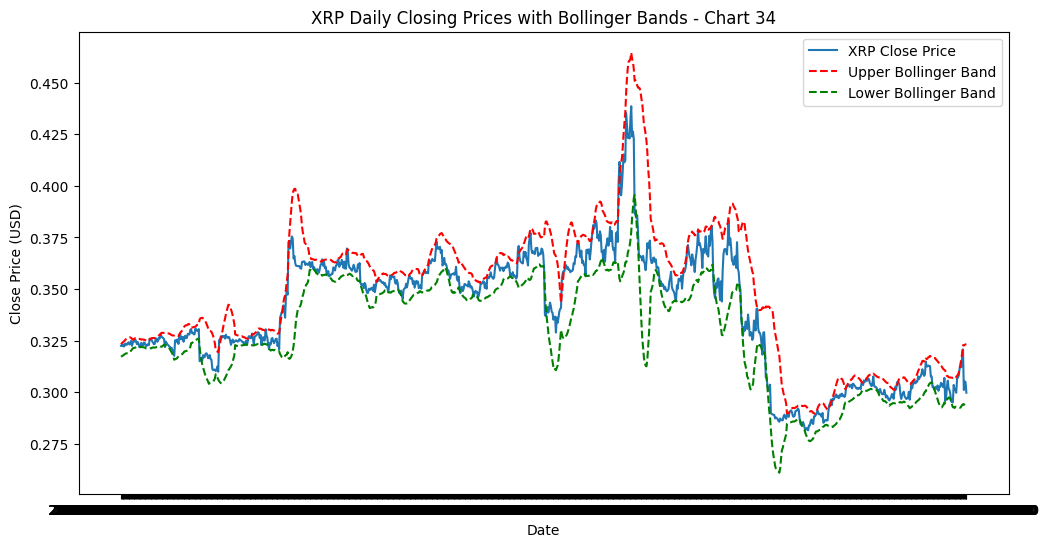

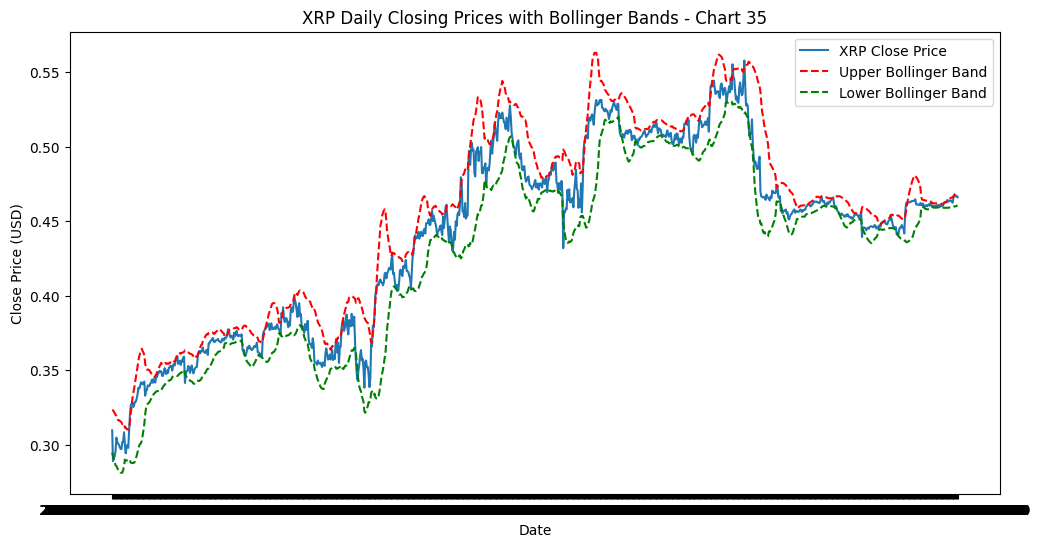

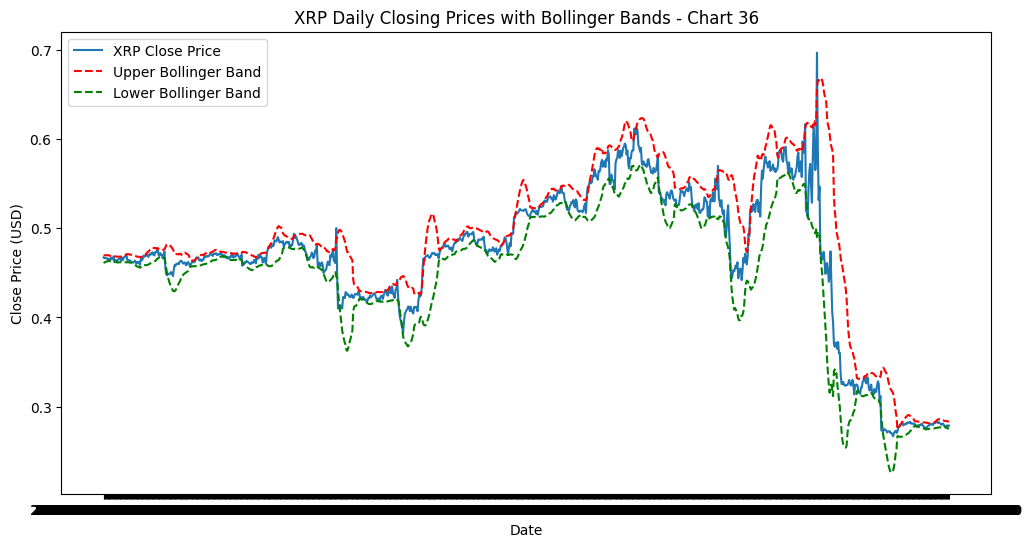

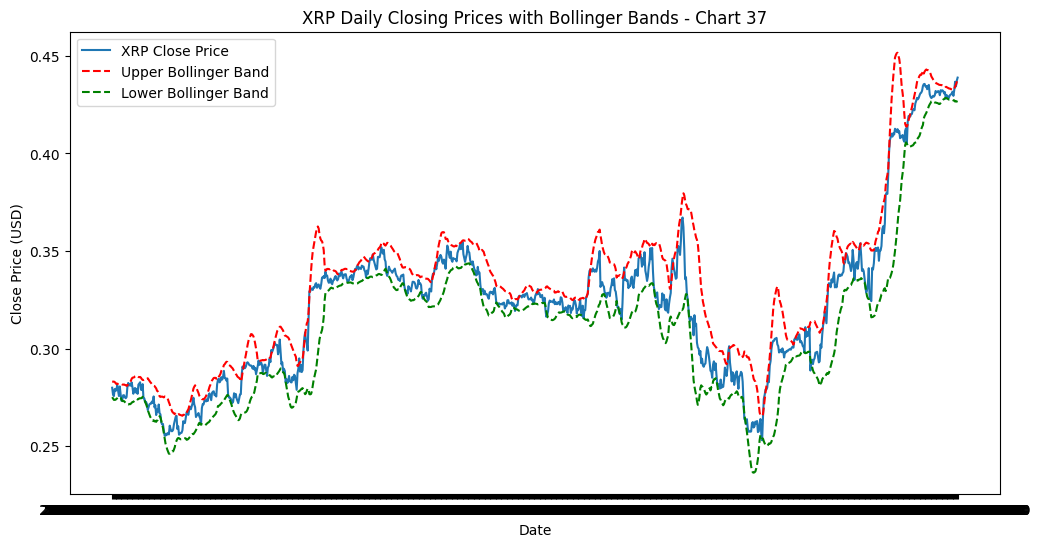

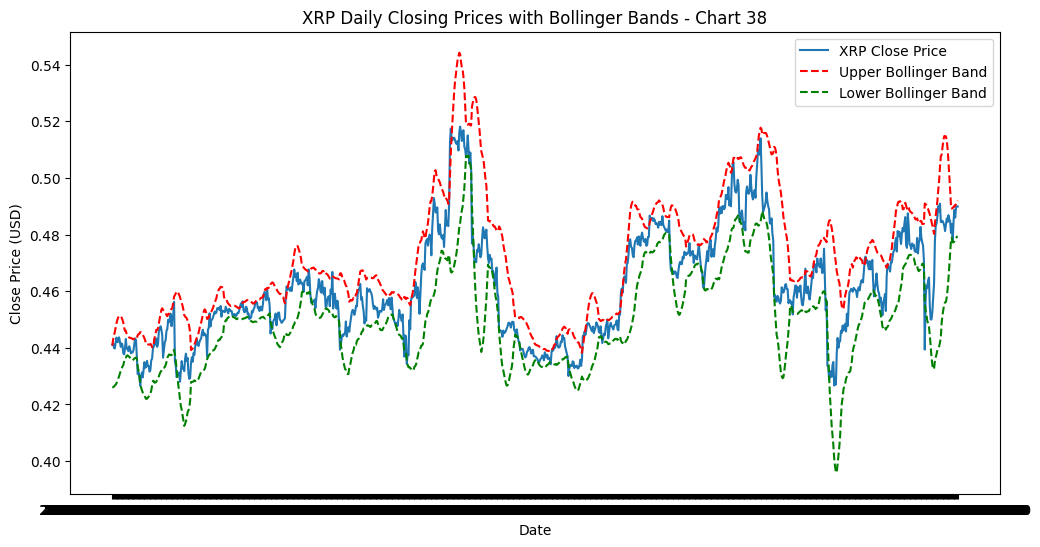

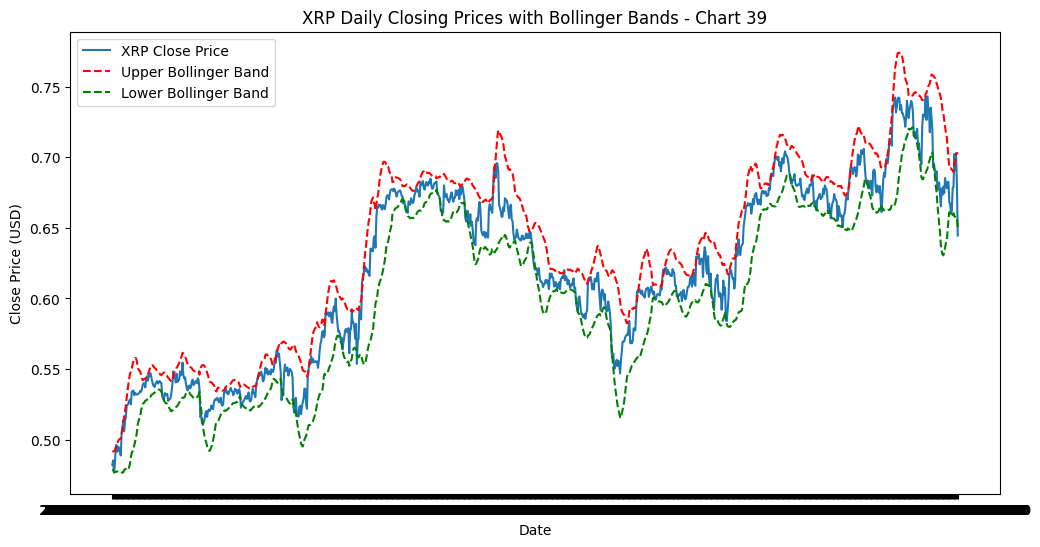

In [ ]:
import matplotlib.pyplot as plt  # Make sure to import the pyplot module

df['12_MA'] = df['Close'].rolling(window=12).mean()
df['Upper_Band'] = df['12_MA'] + 2 * df['Close'].rolling(window=20).std()
df['Lower_Band'] = df['12_MA'] - 2 * df['Close'].rolling(window=20).std()

num_charts = 39
rows_per_chart = 1000
total_rows = len(df)

for i in range(num_charts):
    start_idx = i * rows_per_chart
    end_idx = (i + 1) * rows_per_chart if (i + 1) * rows_per_chart < total_rows else total_rows

    df_subset = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 6))
    plt.plot(df_subset['Date'], df_subset['Close'], label='XRP Close Price')
    plt.plot(df_subset['Date'], df_subset['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
    plt.plot(df_subset['Date'], df_subset['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
    plt.title(f'XRP Daily Closing Prices with Bollinger Bands - Chart {i+1}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.show()



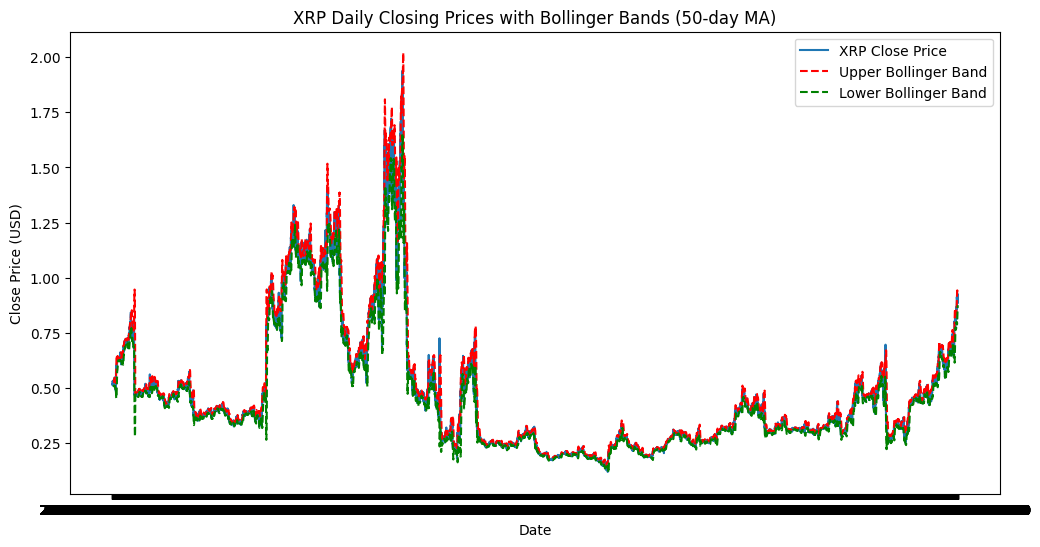

In [ ]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['Upper_Band'] = df['50_MA'] + 2 * df['Close'].rolling(window=50).std()
df['Lower_Band'] = df['50_MA'] - 2 * df['Close'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
plt.title('XRP Daily Closing Prices with Bollinger Bands (50-day MA)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

df_heikin_ashi = df.copy()

df_heikin_ashi['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df_heikin_ashi['HA_Open'] = (df_heikin_ashi['Open'].shift(1) + df_heikin_ashi['Close'].shift(1)) / 2
df_heikin_ashi['HA_High'] = df_heikin_ashi[['High', 'HA_Open', 'HA_Close']].max(axis=1)
df_heikin_ashi['HA_Low'] = df_heikin_ashi[['Low', 'HA_Open', 'HA_Close']].min(axis=1)

dfh = df_heikin_ashi[['HA_Open', 'HA_Close', 'HA_Low', 'HA_High']]

print(dfh)


        HA_Open  HA_Close    HA_Low  HA_High
0           NaN  0.518025  0.516000  0.51970
1      0.518200  0.517400  0.516500  0.51820
2      0.517550  0.516450  0.514000  0.51980
3      0.516000  0.515025  0.511800  0.51720
4      0.515550  0.516100  0.515000  0.51790
...         ...       ...       ...      ...
39187  0.899115  0.910360  0.899115  0.92450
39188  0.908470  0.904635  0.880000  0.92130
39189  0.908620  0.902160  0.895100  0.91027
39190  0.901635  0.913623  0.901000  0.92850
39191  0.912495  0.855750  0.500000  1.50000

[39192 rows x 4 columns]


In [ ]:
df[df['Close']<df['Open']].count()

Unix            19354
Date            19354
Symbol          19354
Open            19354
High            19354
Low             19354
Close           19354
Volume XRP      19354
Volume USDT     19354
tradecount      19354
20_MA           19342
Upper_Band      19331
Lower_Band      19331
50_MA           19331
Daily_Return    19354
dtype: int64

In [ ]:
dfh[dfh['HA_Close']<dfh['HA_Open']].count()

HA_Open     19858
HA_Close    19858
HA_Low      19858
HA_High     19858
dtype: int64

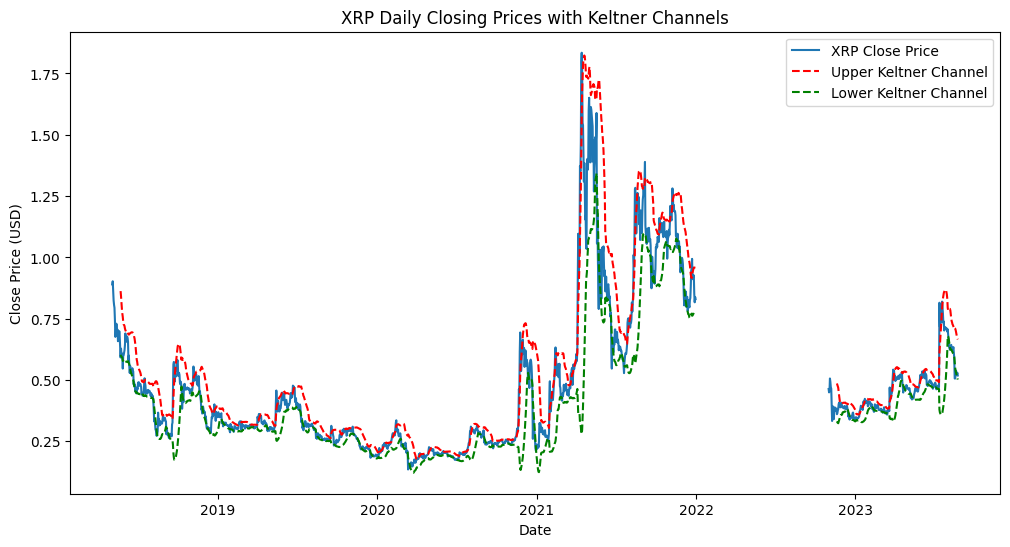

In [ ]:
df['MA'] = df['Close'].rolling(window=20).mean()
df['Upper_Channel'] = df['MA'] + 1.5 * df['Close'].rolling(window=20).std()
df['Lower_Channel'] = df['MA'] - 1.5 * df['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'], df['Upper_Channel'], label='Upper Keltner Channel', linestyle='--', color='red')
plt.plot(df['Date'], df['Lower_Channel'], label='Lower Keltner Channel', linestyle='--', color='green')
plt.title('XRP Daily Closing Prices with Keltner Channels')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


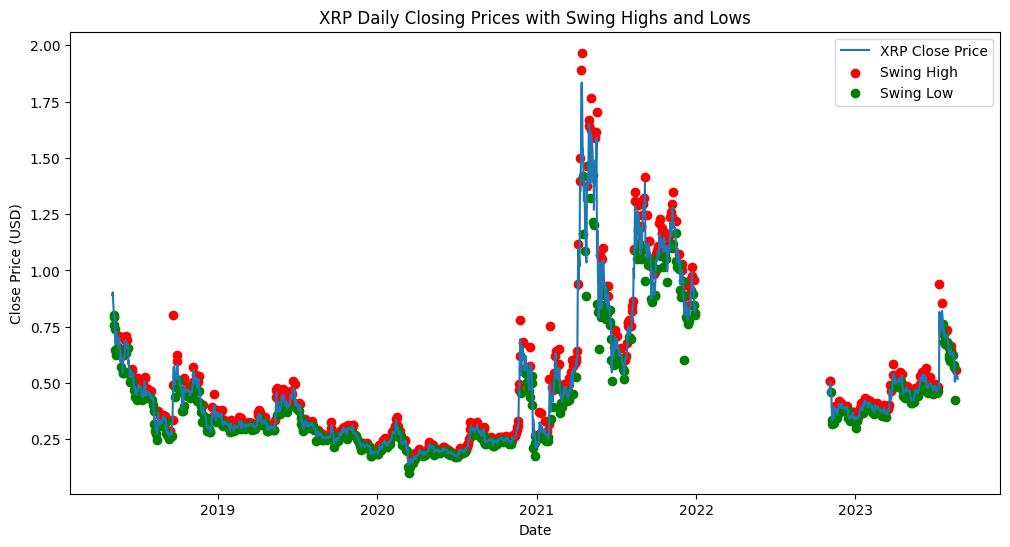

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.scatter(df['Date'][df['High'].rolling(window=3).max() == df['High']], df['High'][df['High'].rolling(window=3).max() == df['High']], color='red', label='Swing High')
plt.scatter(df['Date'][df['Low'].rolling(window=3).min() == df['Low']], df['Low'][df['Low'].rolling(window=3).min() == df['Low']], color='green', label='Swing Low')
plt.title('XRP Daily Closing Prices with Swing Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


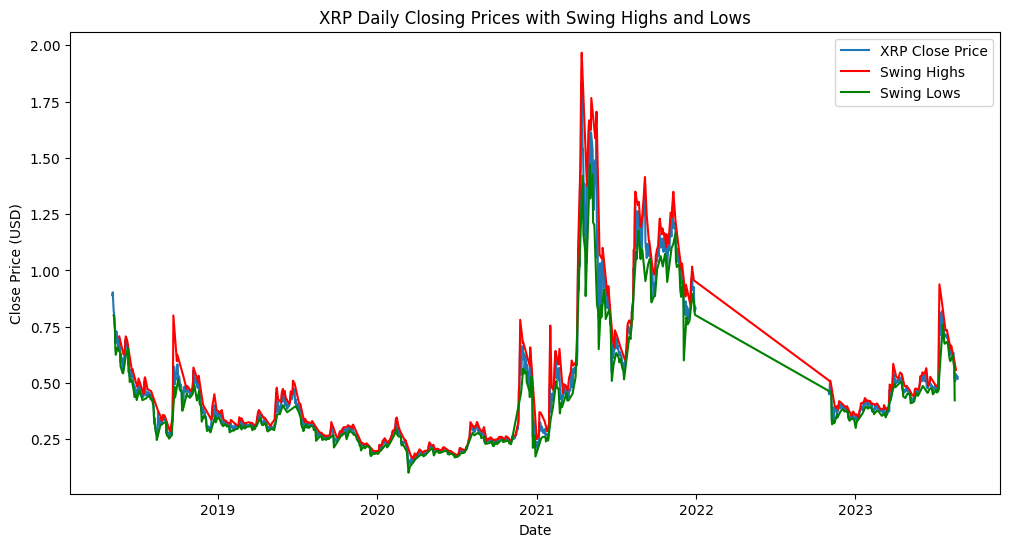

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'][df['High'].rolling(window=3).max() == df['High']], df['High'][df['High'].rolling(window=3).max() == df['High']], color='red', linestyle='-', label='Swing Highs')
plt.plot(df['Date'][df['Low'].rolling(window=3).min() == df['Low']], df['Low'][df['Low'].rolling(window=3).min() == df['Low']], color='green', linestyle='-', label='Swing Lows')
plt.title('XRP Daily Closing Prices with Swing Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


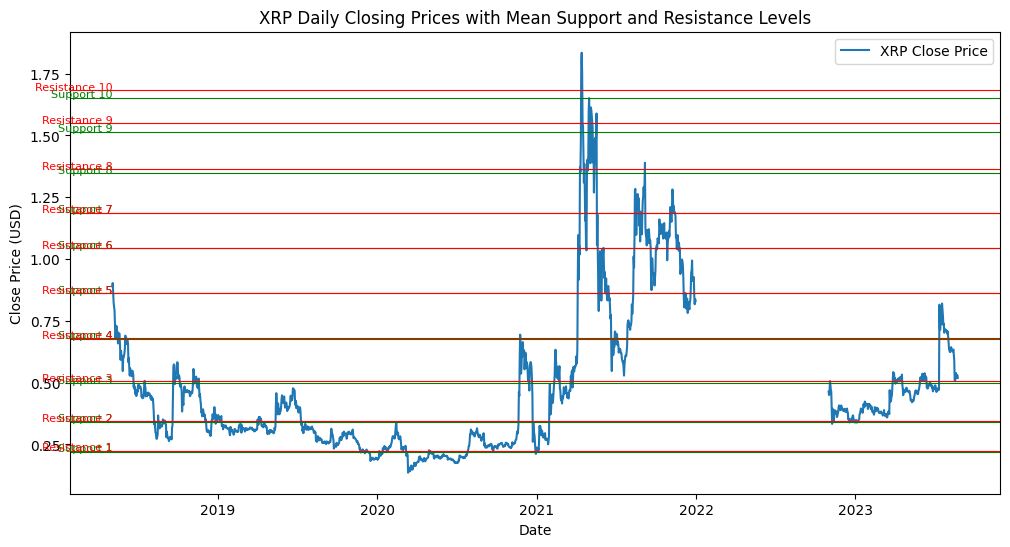

In [ ]:

highest_resistance = df['High'].max()
lowest_support = df['Low'].min()

price_range = np.linspace(lowest_support, highest_resistance, 12)  # 12 points to get 11 segments
price_range_midpoints = (price_range[1:] + price_range[:-1]) / 2

mean_support_resistance = []
for i in range(len(price_range_midpoints) - 1):
    support_area = df[(df['Low'] >= price_range[i]) & (df['Low'] < price_range[i + 1])]['Low'].mean()
    resistance_area = df[(df['High'] >= price_range[i]) & (df['High'] < price_range[i + 1])]['High'].mean()
    mean_support_resistance.append((support_area, resistance_area))

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')

for support, resistance in mean_support_resistance:
    plt.axhline(y=support, color='green', linestyle='-', linewidth=0.8)
    plt.axhline(y=resistance, color='red', linestyle='-', linewidth=0.8)


for i, (support, resistance) in enumerate(mean_support_resistance):
    plt.text(df['Date'].iloc[0], support, f'Support {i+1}', color='green', fontsize=8, ha='right')
    plt.text(df['Date'].iloc[0], resistance, f'Resistance {i+1}', color='red', fontsize=8, ha='right')

plt.title('XRP Daily Closing Prices with Mean Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [ ]:
df["12_MA"].describe()

count    39181.000000
mean         0.472028
std          0.292535
min          0.138679
25%          0.277247
50%          0.380382
75%          0.535083
max          1.841668
Name: 12_MA, dtype: float64

In [ ]:

percentage_threshold = 10
df['ema_pct_change'] = df['12_MA'].pct_change() * 100

no_change_periods = df[abs(df['ema_pct_change']) <= percentage_threshold]

print(no_change_periods.count())


Unix              39180
Date              39180
Symbol            39180
Open              39180
High              39180
Low               39180
Close             39180
Volume XRP        39180
Volume USDT       39180
tradecount        39180
12_MA             39180
Upper_Band        39173
Lower_Band        39173
ema_pct_change    39180
dtype: int64


In [ ]:
percentage_threshold = 10
df['consecutive_rows'] = 0

for i in range(len(df)):
    s = 0
    for j in range(i + 1, len(df)):
        percent_change = ((df.iloc[j]['12_MA'] - df.iloc[i]['12_MA']) / abs(df.iloc[i]['12_MA'])) * 100
        if abs(percent_change) <= percentage_threshold:
            s += 1
        else:
            break
    df.at[i, 'consecutive_rows'] = s

print(df)


                Unix                 Date   Symbol     Open     High     Low  \
0      1692918000000  2023-08-24 23:00:00  XRPUSDT  0.51770  0.51970  0.5160   
1      1692914400000  2023-08-24 22:00:00  XRPUSDT  0.51730  0.51800  0.5165   
2      1692910800000  2023-08-24 21:00:00  XRPUSDT  0.51460  0.51980  0.5140   
3      1692907200000  2023-08-24 20:00:00  XRPUSDT  0.51650  0.51720  0.5118   
4      1692903600000  2023-08-24 19:00:00  XRPUSDT  0.51500  0.51790  0.5150   
...              ...                  ...      ...      ...      ...     ...   
39187  1525435200000  2018-05-04 12:00:00  XRPUSDT  0.91596  0.92450  0.9000   
39188  1525431600000  2018-05-04 11:00:00  XRPUSDT  0.90128  0.92130  0.8800   
39189  1525428000000  2018-05-04 10:00:00  XRPUSDT  0.90199  0.91027  0.8951   
39190  1525424400000  2018-05-04 09:00:00  XRPUSDT  0.92300  0.92850  0.9010   
39191  1525420800000  2018-05-04 08:00:00  XRPUSDT  0.50000  1.50000  0.5000   

         Close  Volume XRP   Volume USD

In [ ]:
df['consecutive_rows'].describe()

count    39192.000000
mean       282.798556
std        300.772230
min          0.000000
25%         84.000000
50%        186.000000
75%        376.000000
max       1956.000000
Name: consecutive_rows, dtype: float64